In [1]:
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt 
towns = gpd.read_file('data/muni_il.shp')
type(towns)

geopandas.geodataframe.GeoDataFrame

In [2]:
towns.describe()

,Shape_Leng,Shape_Area
count,410.000000,4.100000e+02
mean,31093.540274,5.406346e+07
std,53456.453098,2.751385e+08
min,207.628721,2.391524e+03
25%,7509.270548,1.926682e+06
50%,15591.822758,6.650579e+06
75%,26821.332435,1.638424e+07
max,483571.742410,4.088530e+09


In [3]:
towns.columns

Index(['Muni_Heb', 'Muni_Eng', 'Sug_Muni', 'CR_PNIM', 'CR_LAMAS', 'Machoz',
       'Hearot', 'Eshkol_MPn', 'Sign_Date', 'Tikun1', 'Tikun2', 'Tikun3',
       'Tikun4', 'Tikun5', 'Tikun6', 'Tikun7', 'Tikun8', 'Tikun9', 'Tikun10',
       'Tikun11', 'Precision', 'FIRST_Nafa', 'LAST_Nafa2', 'Shape_Leng',
       'Shape_Area', 'SD', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8',
       'T9', 'T10', 'T11', 'geometry'],
      dtype='object')

<Axes: >

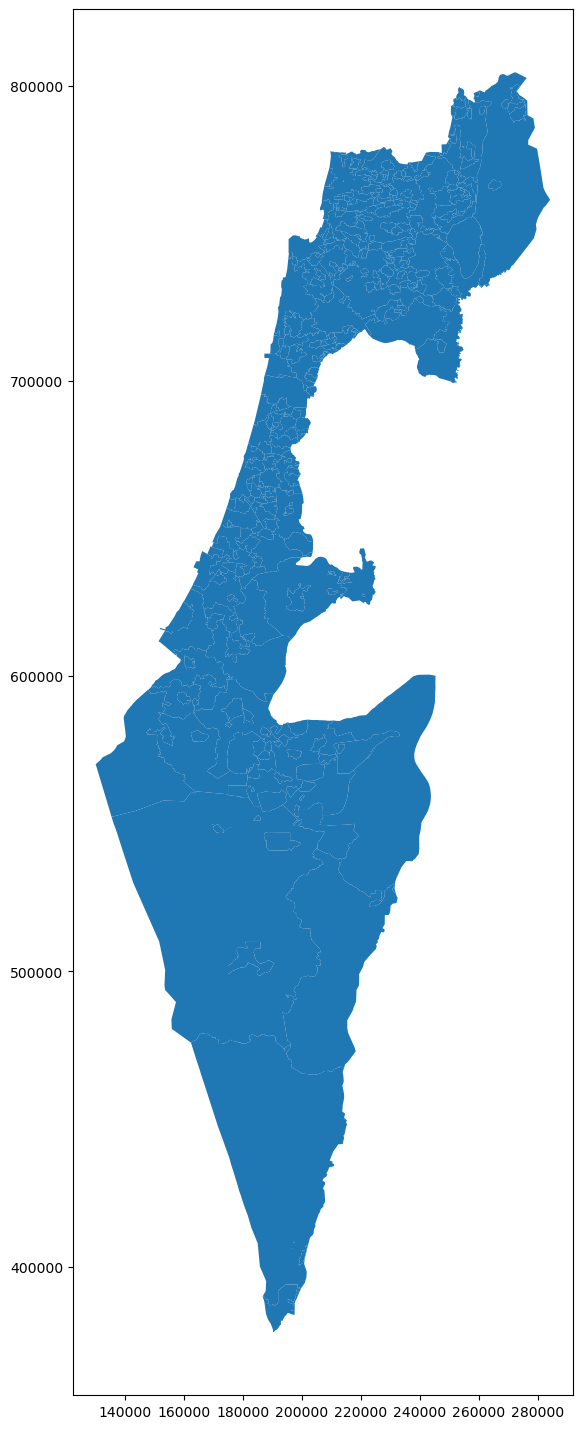

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(15, 18))
towns.plot(ax=ax)

In [5]:
town = towns[towns['Shape_Area'] == towns['Shape_Area'].max()]
town[['Muni_Eng', 'geometry']]

,Muni_Eng,geometry
193,Ramat Negev,"POLYGON Z ((205267.394 541854.916 0.000, 20525..."


<Axes: >

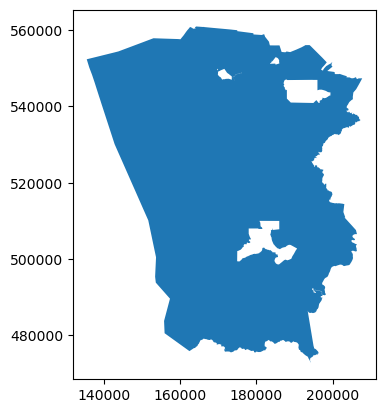

In [6]:
town.plot()

# Biblioteka Shapely

Shapely to pakiet Pythona do pracy z geometrią wektorową. 
Z założenia Shapely zajmuje się jedynie indywidualnymi geometriami, 
ich tworzeniem, pochodnymi właściwościami i zastosowanymi do nich operacjami przestrzennymi.


## Wyznaczanie środka

In [7]:
town.centroid

193    POINT (173229.235 520821.875)
dtype: geometry

<Axes: >

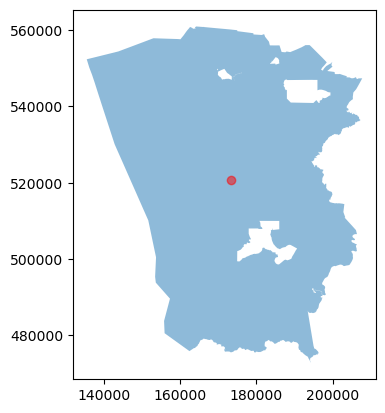

In [8]:
gpd.geodataframe.GeoDataFrame(shapely.GeometryCollection([town['geometry'], town.centroid])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)

## Bufor

<Axes: >

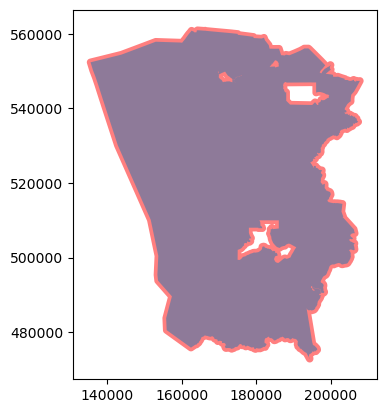

In [9]:
gpd.geodataframe.GeoDataFrame(shapely.GeometryCollection([town.buffer(1000), town['geometry']])).set_geometry(0).plot(color=['r', 'tab:blue'], alpha=0.5)

<Axes: >

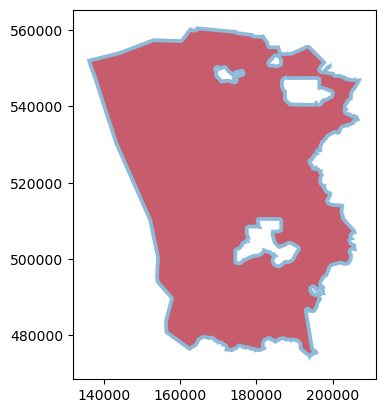

In [10]:
gpd.geodataframe.GeoDataFrame(shapely.GeometryCollection([town['geometry'], town.buffer(-1000)])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)

## Upraszczanie danych

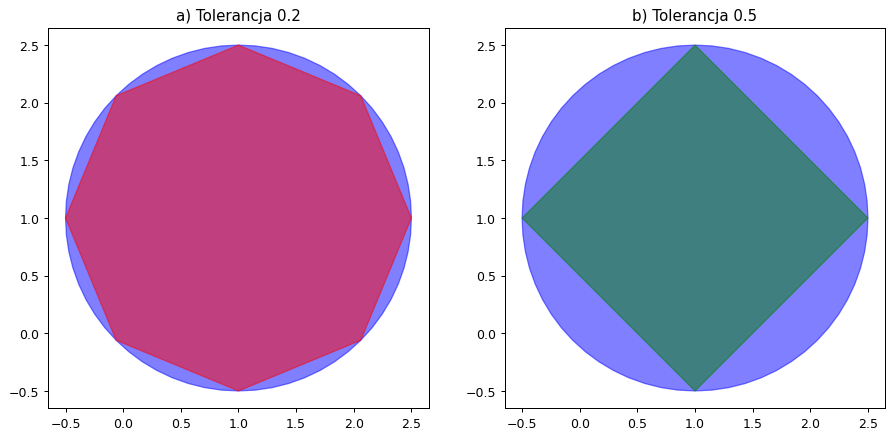

In [11]:
from shapely.plotting import plot_polygon
fig = plt.figure(1, figsize=(12,12), dpi=90)
p = shapely.Point(1, 1).buffer(1.5)

ax = fig.add_subplot(121)
q = p.simplify(0.2)
plot_polygon(p, ax=ax, add_points=False, color='b', alpha=0.5)
plot_polygon(q, ax=ax, add_points=False, color='r', alpha=0.5)
ax.set_aspect('equal', adjustable='box')
ax.set_title('a) Tolerancja 0.2')

ax = fig.add_subplot(122)
r = p.simplify(0.5)
plot_polygon(p, ax=ax, add_points=False, color='b', alpha=0.5)
plot_polygon(r, ax=ax, add_points=False, color='g', alpha=0.5)
ax.set_title('b) Tolerancja 0.5')
ax.set_aspect('equal', adjustable='box')

plt.show()

<Axes: >

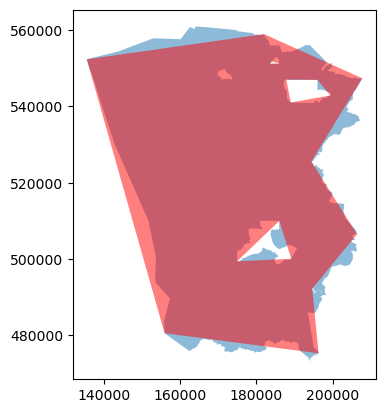

In [12]:
gpd.geodataframe.GeoDataFrame(shapely.GeometryCollection([town['geometry'], town.simplify(5000, preserve_topology=True)])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)

## Przecięcie obiektów

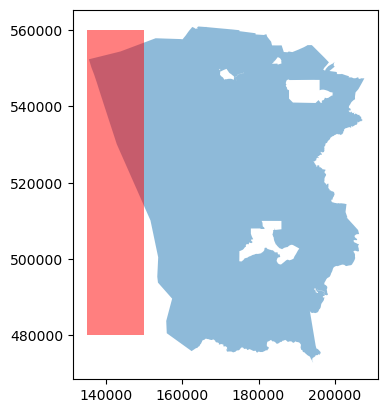

In [13]:
polygon = shapely.from_wkt('POLYGON ((150000 480000, 150000 560000, 135000 560000, 135000 480000, 150000 480000))')
polygon = gpd.GeoDataFrame(index=[0], crs='EPSG:2039', geometry=[polygon])
gpd.geodataframe.GeoDataFrame(shapely.GeometryCollection([town['geometry'], polygon['geometry']])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)
one_town = town.loc[[193],'geometry'].reset_index()
one_polygon = polygon.loc[[0],'geometry']

<Axes: >

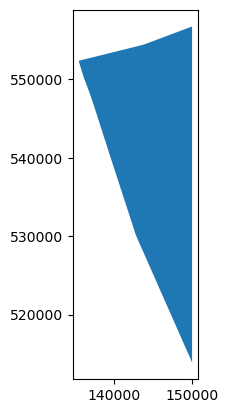

In [14]:
one_town.intersection(one_polygon).plot()

## Unia obiektów

<Axes: >

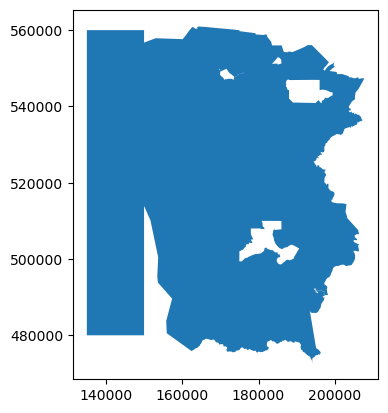

In [15]:
one_town.union(one_polygon).plot()

## Różnica obiektów

<Axes: >

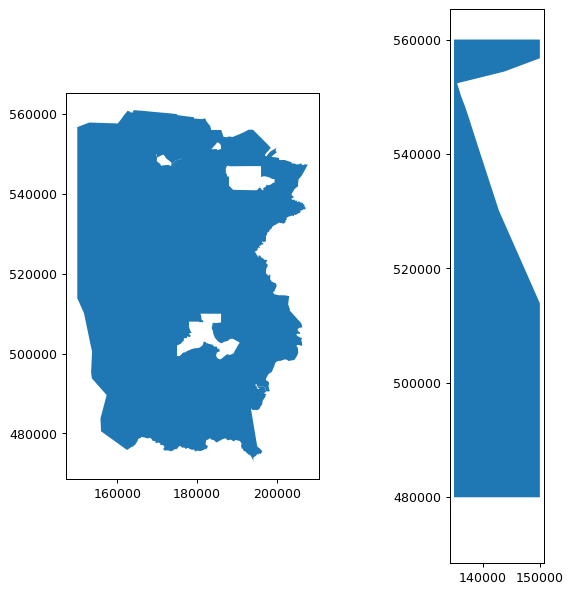

In [16]:
fig = plt.figure(1, figsize=(8,8), dpi=90)
ax1 = fig.add_subplot(121)
one_town.difference(one_polygon).plot(ax=ax1)
ax2 = fig.add_subplot(122)
ax2.sharey(ax1)
one_polygon.difference(one_town).plot(ax=ax2)

## Różnica symetryczna obiektów

<Axes: >

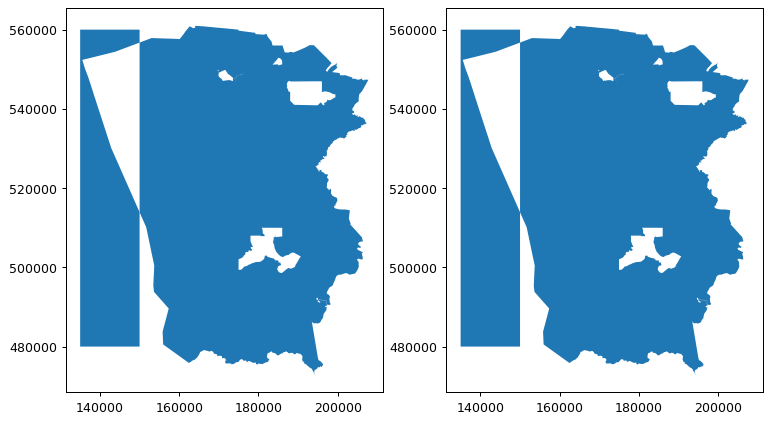

In [17]:
fig = plt.figure(1, figsize=(10,10), dpi=90)
ax = fig.add_subplot(121)
one_town.symmetric_difference(one_polygon).plot(ax=ax)
ax = fig.add_subplot(122)
one_polygon.symmetric_difference(one_town).plot(ax=ax)

## Metody transformacji typów

In [18]:
import pandas as pd
# Ta tabela zawiera kształty linii transportu publicznego.
shapes = pd.read_csv('data/gtfs/shapes.txt')
pnt = shapes[shapes['shape_id'] == 136236]
geom = gpd.points_from_xy(pnt['shape_pt_lon'], pnt['shape_pt_lat'], crs=4326)
pnt = gpd.GeoDataFrame(data=pnt, geometry=geom)
pnt = pnt.drop(['shape_pt_lon', 'shape_pt_lat', 'shape_id', 'shape_pt_sequence'], axis=1)

### Punkty do linii

<Axes: >

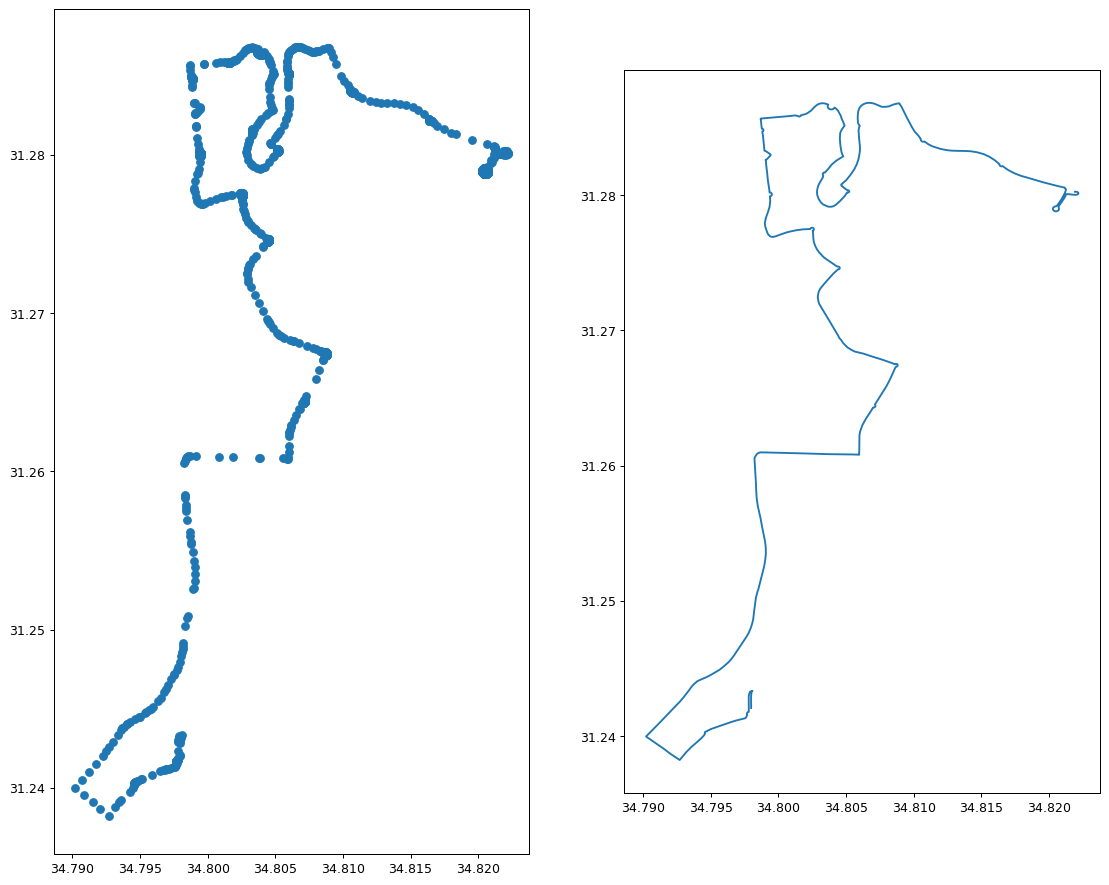

In [19]:
fig = plt.figure(1, figsize=(15,15), dpi=90)
ax = fig.add_subplot(121)
pnt.plot(ax=ax)
ax = fig.add_subplot(122)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.GeometryCollection(shapely.LineString(pnt.geometry.to_list()))])).set_geometry(0).plot(ax=ax)

### Punkty do wielokąta

<Axes: >

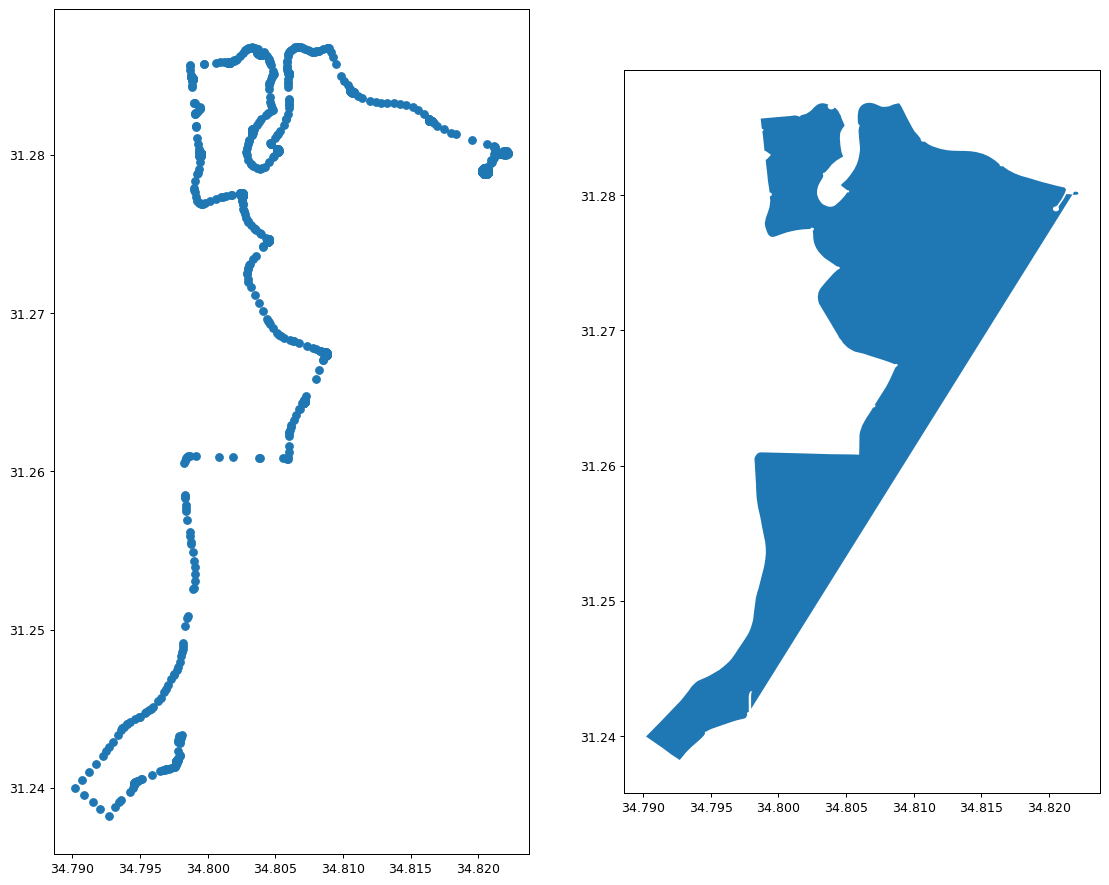

In [20]:
fig = plt.figure(1, figsize=(15,15), dpi=90)
ax = fig.add_subplot(121)
pnt.plot(ax=ax)
ax = fig.add_subplot(122)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.GeometryCollection(shapely.Polygon(pnt.geometry.to_list()))])).set_geometry(0).plot(ax=ax)

### Linia do wielokąta

<Axes: >

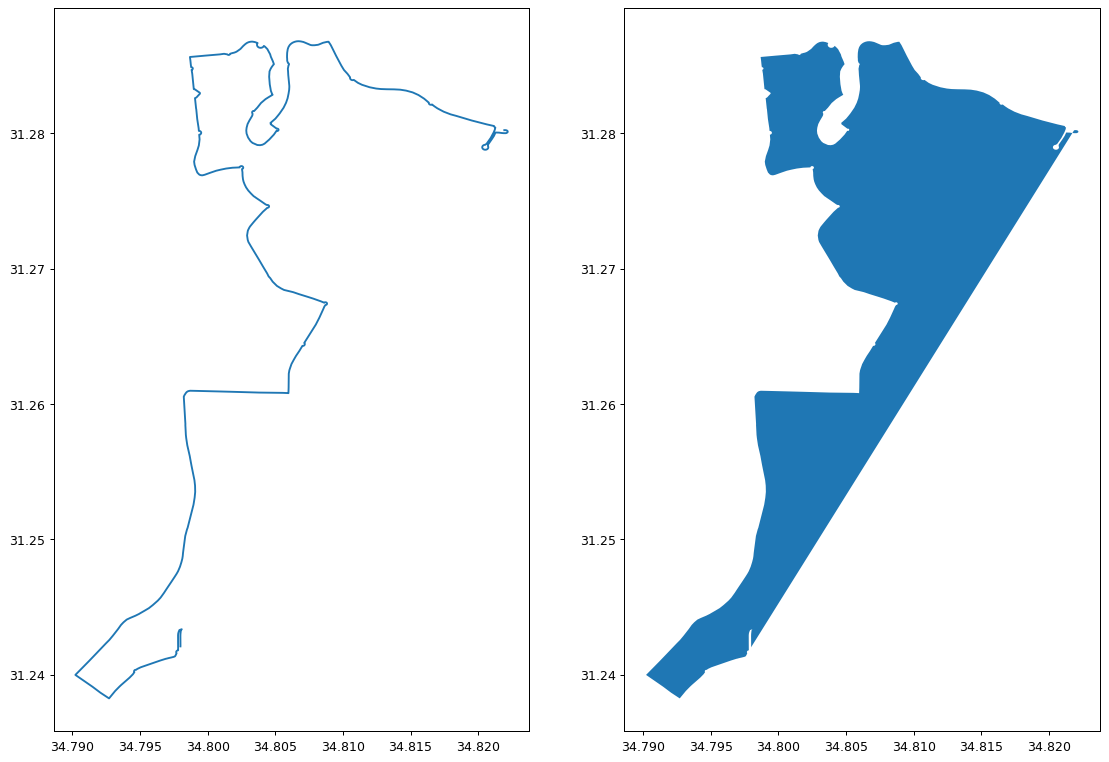

In [21]:
fig = plt.figure(1, figsize=(15,15), dpi=90)
ax = fig.add_subplot(121)
pnt = pnt.geometry.to_list()
lines = shapely.LineString(pnt)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.GeometryCollection(lines)])).set_geometry(0).plot(ax=ax)

ax = fig.add_subplot(122)
polygon = shapely.geometry.Polygon(lines)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.GeometryCollection(polygon)])).set_geometry(0).plot(ax=ax)

### Linia do punktów

<Axes: >

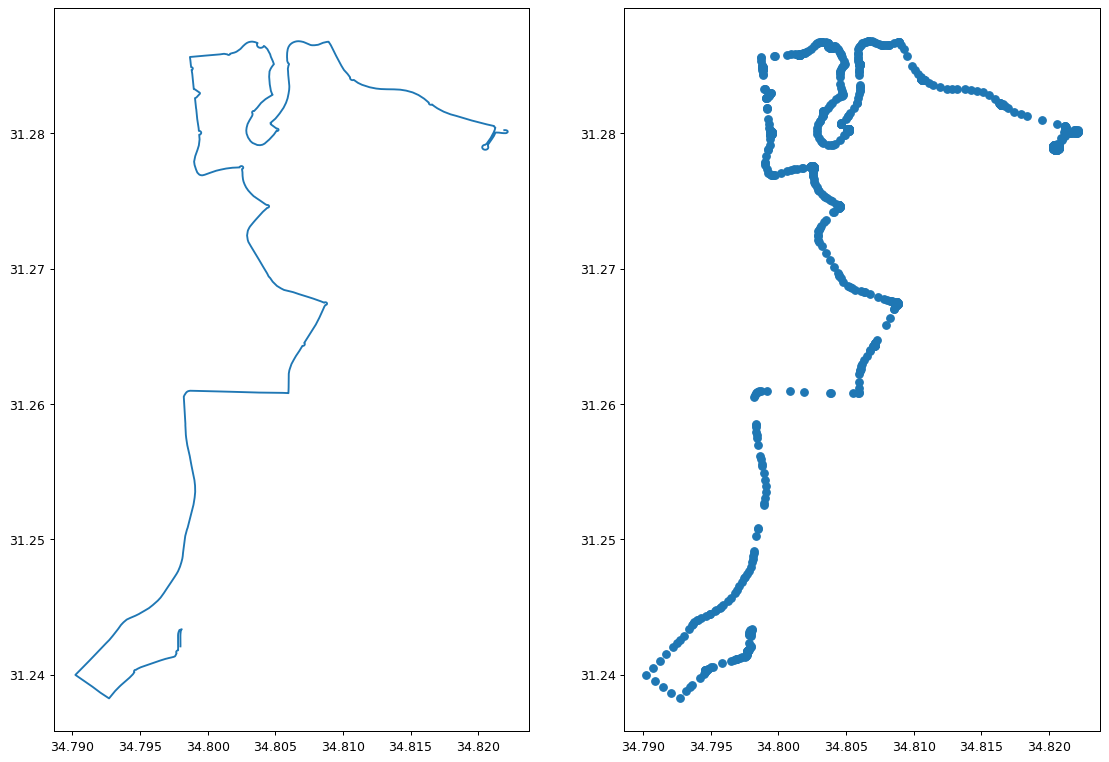

In [22]:
fig = plt.figure(1, figsize=(15,15), dpi=90)
ax = fig.add_subplot(121)
lines = shapely.LineString(pnt)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.GeometryCollection(lines)])).set_geometry(0).plot(ax=ax)

ax = fig.add_subplot(122)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.geometry.MultiPoint(lines.coords)])).set_geometry(0).plot(ax=ax)

### Wielokąt do linii

<Axes: >

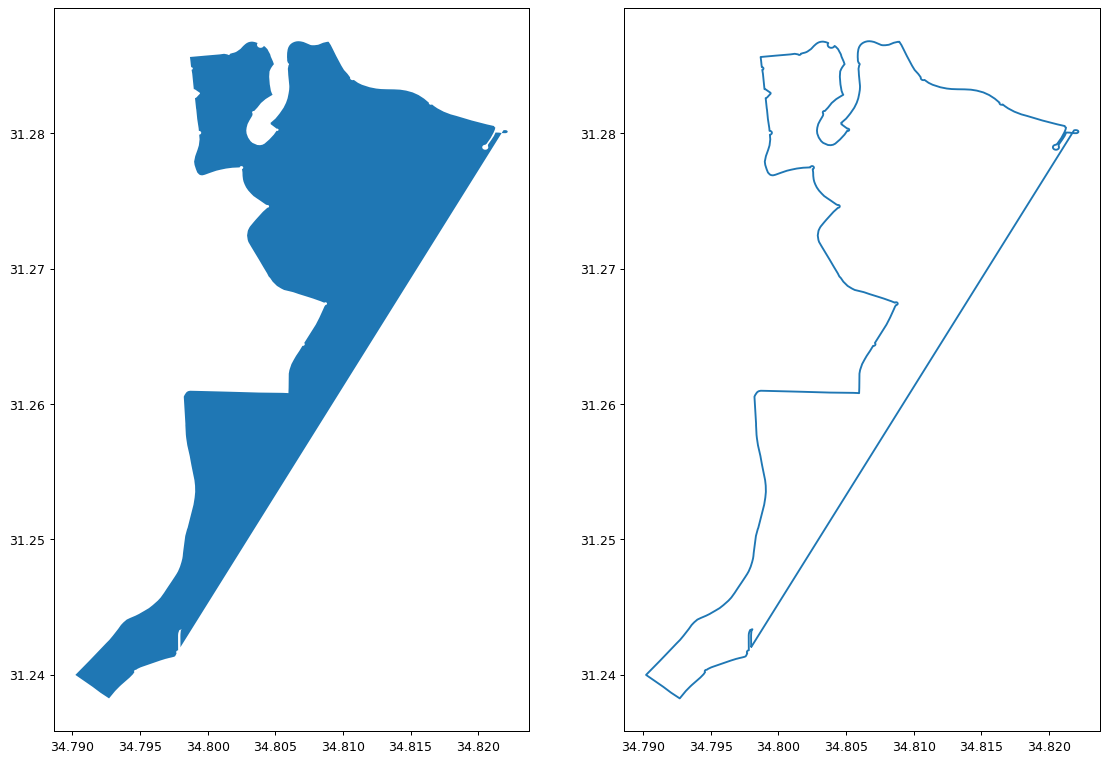

In [23]:
line_from_polygon = []
boundary = polygon.boundary
if boundary.geom_type == 'MultiLineString':
    for line in boundary:
        line_from_polygon.append(line)
else:
    line_from_polygon.append(boundary)

fig = plt.figure(1, figsize=(15,15), dpi=90)
ax = fig.add_subplot(121)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.GeometryCollection(polygon)])).set_geometry(0).plot(ax=ax)

ax = fig.add_subplot(122)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([line_from_polygon])).set_geometry(0).plot(ax=ax)


### Wielokąt do punktów

<Axes: >

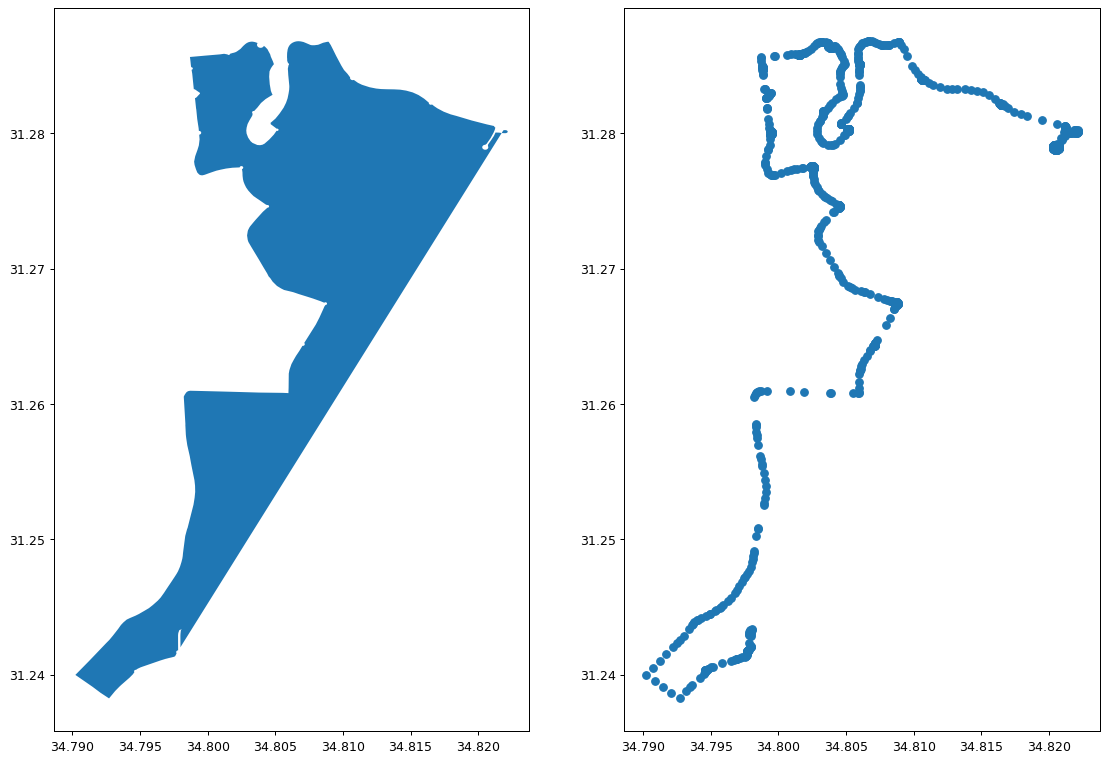

In [24]:
fig = plt.figure(1, figsize=(15,15), dpi=90)
ax = fig.add_subplot(121)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.GeometryCollection(polygon)])).set_geometry(0).plot(ax=ax)
ax = fig.add_subplot(122)
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([shapely.geometry.MultiPoint(line_from_polygon[0].coords)])).set_geometry(0).plot(ax=ax)

## Transformacje afiniczne

### affine_transform

<Axes: >

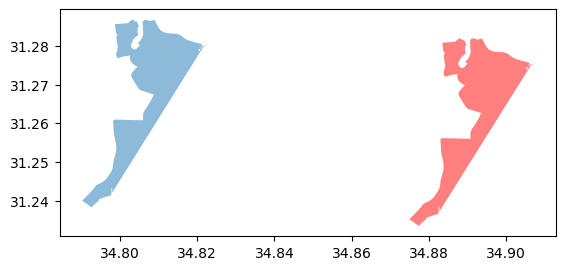

In [25]:
a = 1.0001
b = 0.001
d = -0.001
e = 1
xoff = 0.05
yoff = 0.03
matrix = [a, b, d, e, xoff, yoff]
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([polygon, shapely.affinity.affine_transform(polygon, matrix)])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)

### rotate

<Axes: >

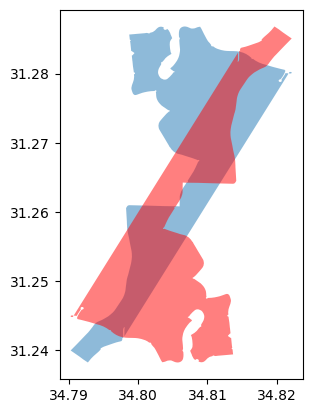

In [26]:
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([polygon, shapely.affinity.rotate(polygon, 180)])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)

### scale

<Axes: >

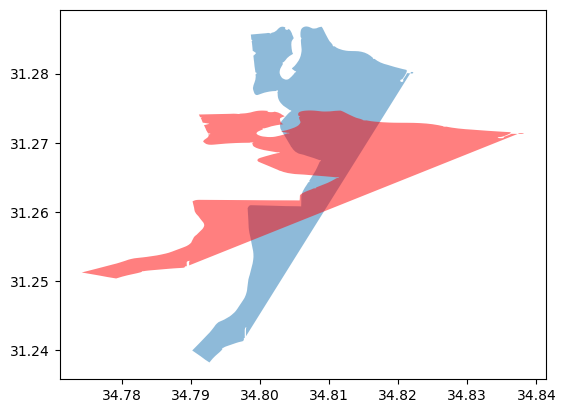

In [27]:
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([polygon, shapely.affinity.scale(polygon, xfact=2.0, yfact=0.5)])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)

### skew

<Axes: >

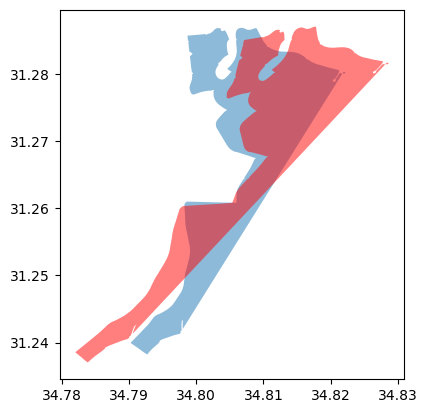

In [28]:
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([polygon, shapely.affinity.skew(polygon, xs=20.0, ys=5.0)])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)

### translate

<Axes: >

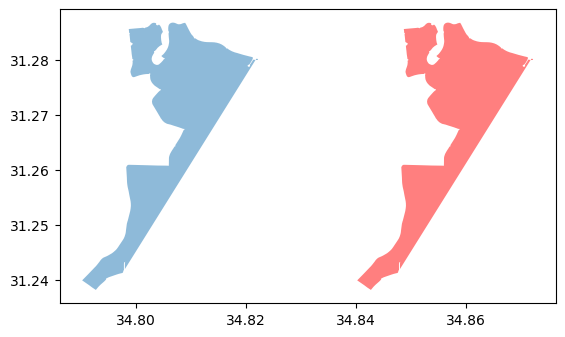

In [29]:
gpd.geodataframe.GeoDataFrame(gpd.geodataframe.GeoDataFrame([polygon, shapely.affinity.translate(polygon, xoff=0.05, yoff=0.0)])).set_geometry(0).plot(color=['tab:blue', 'r'], alpha=0.5)